# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random

users = dataset.shape[0]
adverts = dataset.shape[1]
ads_selected = []
numbers_of_rewards_1 = [0] * adverts # number of times the ad i got reward 1 up to round n
numbers_of_rewards_0 = [0] * adverts # number of times the ad i got reward 0 up to round n
total_rewards = 0

for user in range(0, users):
    ad = 0 # ad selected at each round
    max_random = 0 # max random draw

    for advert in range(0, adverts):
        random_beta = random.betavariate(numbers_of_rewards_1[advert] + 1, numbers_of_rewards_0[advert] + 1) # for each ad we draw a random number from the beta distribution

        if (random_beta > max_random): # select the ad that has the highest random draw
            max_random = random_beta
            ad = advert
    
    ads_selected.append(ad)
    # update the number of rewards for the selected ad
    reward = dataset.values[user, ad]
    if (reward == 1):
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_rewards += reward
    

## Visualising the results - Histogram

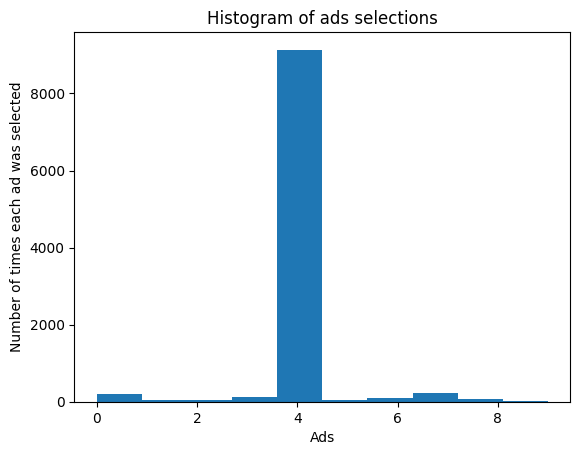

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()